<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/01_Neural_Network_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction Regression with Neural Network in TensorFlow**

There are many definitions for the regression problem but in our case, we're going to simplify it. Predicting a number based few inputs called features and label called output

More simple : Predicting a number

In [341]:
# Import TensorFlow

import tensorflow as tf

print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-11-26 03:52:25.073311


**Creating data to view and fit**

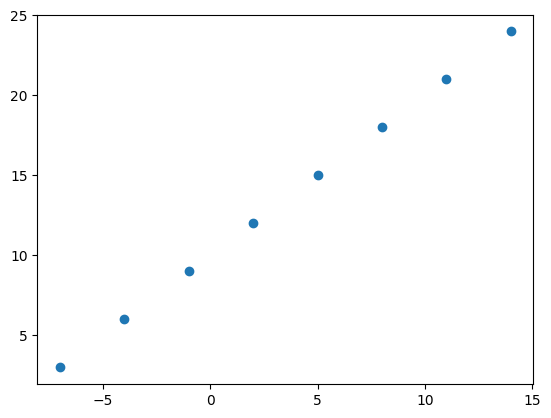

In [342]:
import numpy as np
import matplotlib.pyplot as plt

#Create features

X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)



In [343]:
y == X + 10 #if we closely observe the relation between above graph then we can realize as it is as true y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Input and Output Shapes**

In [344]:
#Create a demo tensor for our housing price prediction problems

house_info = tf.constant(["bedroom", "bathroom", "garage"]) # Shape would be 3
house_price = tf.constant([939700])   # Shape would be 1
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [345]:
house_info.shape

TensorShape([3])

In [346]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [347]:
X[0], y[0]

(-7.0, 3.0)

In [348]:
X[1], y[1]

(-4.0, 6.0)

In [349]:
# turn our numpy arrays as tensors with dtype float32

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [350]:
input_shape = X[0].shape    # as scalar has shape 0 it will not give us the shape
output_shape = y[0].shape   # as scalar has shape 0 it will not give us the shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

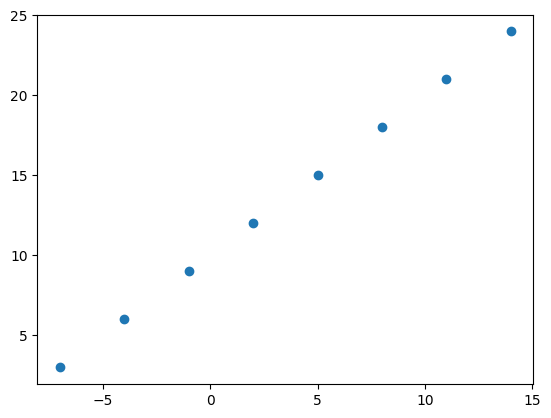

In [351]:
plt.scatter(X,y)

**Steps in modeling with TensorFlow**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2.Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [352]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 20.1580 - mae: 20.1580
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 19.8768 - mae: 19.8768
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 19.5955 - mae: 19.5955
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 19.3143 - mae: 19.3143
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 19.0330 - mae: 19.0330


In [353]:
# Chench the X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [354]:
#Try and make a prediction using a model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 136ms/step


array([[-19.48794]], dtype=float32)

In [355]:
y_pred + 11

array([[-8.48794]], dtype=float32)

**Improving the model**

We can improve our model by altering the steps we taken to create our model

1. **Creating model** : here We might add more layers, increase the number of hidden layers, chnage the activation function of each layer.

2. **Compiling a model** : Here we might change the optimization function or perhaps the **Learning rate** of the optimization function.

3. **Fitting a model** : Here we might fit a model for more **Epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [356]:

# Create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# in the output it would be improved for better than before by just increasing the epochs to 100 training examples

Epoch 1/100
1/1 [==============================] - 1s 589ms/step - loss: 7.9014 - mae: 7.9014
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7689 - mae: 7.7689
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6364 - mae: 7.6364
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 7.5039 - mae: 7.5039
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 7.4700 - mae: 7.4700
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4644 - mae: 7.4644
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 7.4587 - mae: 7.4587
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4531 - mae: 7.4531
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4475 - mae: 7.4475
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 7.4419 - mae: 7.4419
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - l

In [357]:
# Reming ourselves of the data

model.predict([17.0])

1/1 [==============================] - 0s 205ms/step


array([[30.33316]], dtype=float32)

In [358]:
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.5626 - mae: 15.5626
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 14.9626 - mae: 14.9626
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 14.4751 - mae: 14.4751
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0349 - mae: 14.0349
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.5984 - mae: 13.5984
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1635 - mae: 13.1635
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7292 - mae: 12.7292
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 12.2952 - mae: 12.2952
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 11.8613 - mae: 11.8613
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4272 - mae: 11.4272
Epoch 11/100
1/1 [==============================] -

In [359]:
model.predict([17.0])

1/1 [==============================] - 0s 263ms/step


array([[27.255772]], dtype=float32)

In [360]:
# Create the model with the extra layers which are hidden

#Creare a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),  # We can use any kind of activation
    #tf.keras.layers.Dense(1000, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics =["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100) # it would get more optimized after this modiciation by adding 1 more hidden layer with 100 neurons


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7377 - mae: 13.7377
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 13.2715 - mae: 13.2715
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 12.8053 - mae: 12.8053
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.3368 - mae: 12.3368
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 11.8634 - mae: 11.8634
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 11.3829 - mae: 11.3829
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 10.8926 - mae: 10.8926
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 10.3901 - mae: 10.3901
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.8728 - mae: 9.8728
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 9.3381 - mae: 9.3381
Epoch 11/100
1/1 [==============================] - 0s 

In [361]:
#Let's remind ourselves of the data

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [362]:
model.predict([17])

#1/1 [==============================] - 0s 37ms/step
#array([[32.63552]], dtype=float32). before this model was better than this but this is better than the initial one


1/1 [==============================] - 0s 323ms/step


array([[30.738218]], dtype=float32)

**Evaluating the Models**

1. In Practice a typical work flow u go through in building the neural networks model is : Build a model -> fit it -> evaluate it -> tweak a model. -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ......

2. When it comes to evaluation... there are 3 words you should momorize : "Visualize, visualize, visualize"

3. When it comes to building a model...u should keep in mind that u have to "Experiment Experiment and Experiment until u get the expected result"

**It's a goof idea to visualize :**

* The data -> what data are we working with ? what does it look like
* The model itself -> what does our model look like ?
* The training model -> How does the model perform while it learns ?
* The predictions of the model ->  How do the predictions of a model line up against the ground truth(Labels) ?



In [363]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [364]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

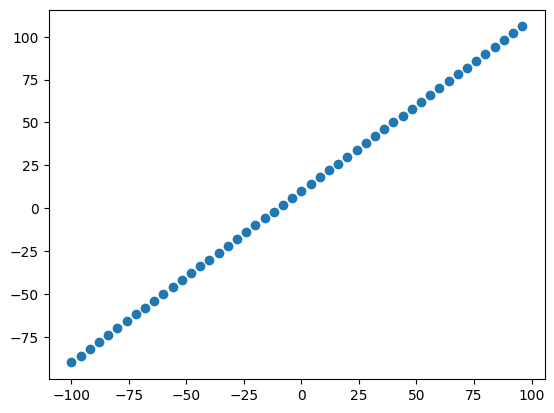

In [365]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

*** Training Set** - The model learns from this data, which is typically 70 - 80% of the total data u have available

*** Validation Set** - The model gets tuned on this data, which is typically 10 - 15% of the data available

*** Test Set** - the model gets evaluated on this data to test what it has learned, this set typically 10 - 15% of the total data available.

In [366]:
## Check the length of how many data samples we have

len(X) #Usually we will have more than 100 but we have 50 as of now

50

In [367]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

**Visualizing the data**

* Now we've got our training and test data sets.. Let's visualize them again to have better understanding


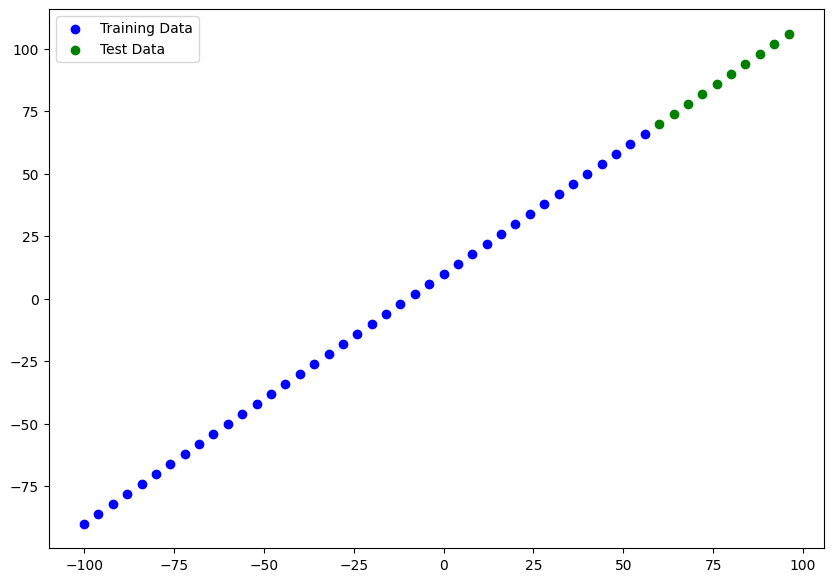

In [368]:
plt.figure(figsize=(10,7)) #

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training Data")  # c = "b" means color blue

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Test Data") # c = "g" means color green
plt.legend() # Gives the labels within the graph

In [369]:
# Let's have a look at how to create the neural Netwrok

#1.Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss = "mae", # or loss = tf.keras.losses.mae
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100) # can also build the models using the build() or fit()


Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 82.9730 - mae: 82.9730
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 47.5655 - mae: 47.5655
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 13.6153 - mae: 13.6153
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 7.7621 - mae: 7.7621
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 11.3288 - mae: 11.3288
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 10.4552 - mae: 10.4552
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4302 - mae: 9.4302
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2958 - mae: 9.2958
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 12.0086 - mae: 12.0086
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 13.9794 - mae: 13.9794
Epoch 11/100
2/2 [==============================] - 0s 

#Visualizing the model

In [370]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [371]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

#1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
],name ="CHENCHU_MODEL")

#2 compile the model

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3 Fit the model





In [372]:
model.summary()

Model: "CHENCHU_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**ELABORATION OF THE SUMMARY**

***Total params:** Total number of parameters in the model

 ***Trainable params:** These are the parameters (Patterns) the model can update as it trains

***Non-trainable params:** these parameters aren't updated during the training(this is typical when you bring in already learn patterns or parameters from other models during the transfer learning)

**Resource :**  For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video https://youtu.be/QDX-1M5Nj7s

**Excercise :**  Try playing with the number of hidden units in the dense layer see how that effects the number of parameters (Total and trainable ) by calling model.summary()

In [373]:
#Let's fit our model to the training the data

model.fit(X_train, y_train, epochs = 100, verbose=0) # Verbosity mode  0 = Silent 1= progress bar 2 = one line per epoch


In [374]:
# Get the model summary
model.summary()

Model: "CHENCHU_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


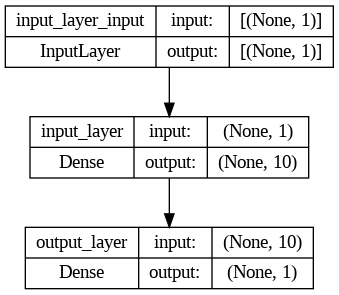

In [375]:
# We can also visualize the data using the plot_model from utils

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

**Visualizing the model predictions**

To visualize the predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (Ground truth versus model predictions)






In [376]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred # Will print the predictions

1/1 [==============================] - 0s 175ms/step


array([[ 76.28348 ],
       [ 81.25434 ],
       [ 86.22521 ],
       [ 91.196075],
       [ 96.16694 ],
       [101.1378  ],
       [106.108665],
       [111.07953 ],
       [116.05039 ],
       [121.02126 ]], dtype=float32)

In [377]:
y_test # will print the ground truth labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note :** If you feel like u will use the functionality in the future it's better to make them as functions to reuse again

In [378]:

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels =y_test,
                    predictions = y_pred):

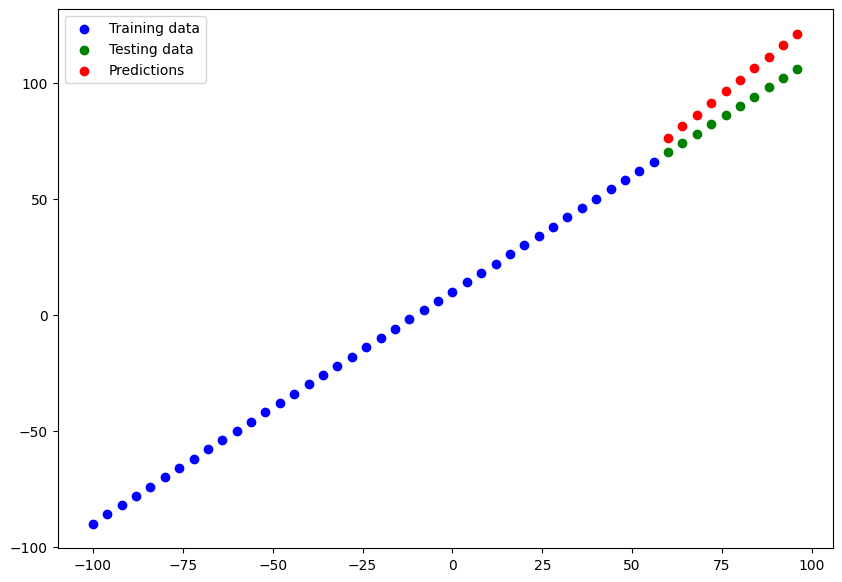

In [379]:
plot_predictions()

**Evaluation of Model Performance:**

* Evaluating our models prediction with regression evaluation metrics
* Depending on the problem that you are working on, There will be different evaluation metrics to evaluate your model's performance.
* Since you are working on a regression, two of the main metrics:
  * MAE : Mean Absolute Error (On average, how wrong is each of my model's prediction)
  * MSE : Mean Square Error, (Square Average Errors)



In [380]:
# Evaluate the model on the test s
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 546ms/step - loss: 10.6524 - mae: 10.6524


[10.652371406555176, 10.652371406555176]

In [381]:
# Calculate the Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.4299135, 11.098264 , 10.       , 10.239215 , 11.666776 ,
       14.282681 , 18.108665 , 23.079529 , 28.05039  , 33.021263 ],
      dtype=float32)>

In [382]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.28348 ],
       [ 81.25434 ],
       [ 86.22521 ],
       [ 91.196075],
       [ 96.16694 ],
       [101.1378  ],
       [106.108665],
       [111.07953 ],
       [116.05039 ],
       [121.02126 ]], dtype=float32)>

In [383]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [384]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.28348 ,  81.25434 ,  86.22521 ,  91.196075,  96.16694 ,
       101.1378  , 106.108665, 111.07953 , 116.05039 , 121.02126 ],
      dtype=float32)>

In [385]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.6523695>

In [386]:
# Calculate the mean squeare Error

mse = tf.metrics.mean_squared_error(y_true = y_test,
                                  y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=121.249245>

In [387]:
# Make some functions to reuse the MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred = y_test)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = y_pred)



# Running Experiments to improve our model

Build model -> fit it -> Evaluate it -> tweak it -> fit it -> Evaluate it -> Tweak it -> fit it -> Evaluate it....

1. Get More data : More exampled for your model to train on (More oppurtunities to learn patterns or relationships between and labels)
2. Make your model larger : (Using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train For longer : Give your model to more time to find the patterns in the data



Let's do 3 modeling experiments :

1. Model_1 - Same as original one, 1 layer, trained for 100 epochs
2. Model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs
4. You experiment with your own

**Now let's build the model1**



In [388]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [389]:
# Set random seed
tf.random.set_seed(42)

#1. Build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#3. Fit the model
model.fit(X_train, y_train, epochs = 100)





Epoch 1/100
2/2 [==============================] - 0s 48ms/step - loss: 15.4589 - mae: 15.4589
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 8.0930 - mae: 8.0930
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 17.6018 - mae: 17.6018
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 9.8795 - mae: 9.8795
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 12.2191 - mae: 12.2191
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 9.7617 - mae: 9.7617
Epoch 7/100
2/2 [==============================] - 0s 44ms/step - loss: 10.8059 - mae: 10.8059
Epoch 8/100
2/2 [==============================] - 0s 34ms/step - loss: 13.7366 - mae: 13.7366
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 24.8308 - mae: 24.8308
Epoch 10/100
2/2 [==============================] - 0s 34ms/step - loss: 15.3354 - mae: 15.3354
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 264ms/step


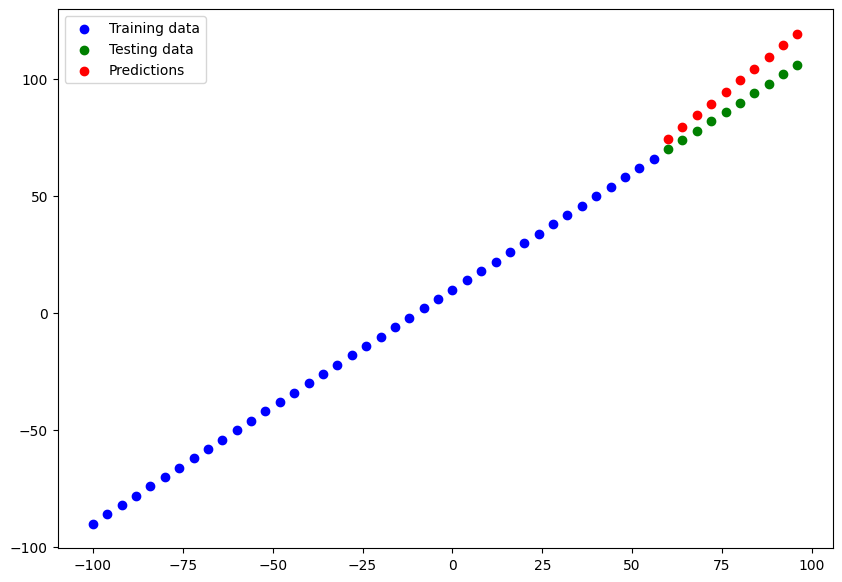

In [390]:
#4.Predict from the model
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [391]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 74.61151 ],
        [ 79.58561 ],
        [ 84.55971 ],
        [ 89.53381 ],
        [ 94.50791 ],
        [ 99.48201 ],
        [104.456116],
        [109.430214],
        [114.40431 ],
        [119.37842 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 74.61151 ,  79.58561 ,  84.55971 ,  89.53381 ,  94.50791 ,
         99.48201 , 104.456116, 109.430214, 114.40431 , 119.37842 ],
       dtype=float32)>)

In [392]:
#5. Evaluate the prediction for model 1

mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=88.73753>)

**Build Model_2**
  * 2 dense layers, trained for 100 epochs

  

In [395]:
#Model_2

#Set the random seed
tf.random.set_seed(42)

# Build model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])
# 3. Fit the model

model_2.fit(X_train, y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 1s 24ms/step - loss: 40.2211 - mae: 40.2211
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 28.0478 - mae: 28.0478
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 33.5260 - mae: 33.5260
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 25.9263 - mae: 25.9263
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.2511 - mae: 14.2511
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 11.4013 - mae: 11.4013
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 12.4371 - mae: 12.4371
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 10.9797 - mae: 10.9797
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 38.9099 - mae: 38.9099
Epoch 10/100
2/2 [==============================] - 0s 17ms/step - loss: 26.5017 - mae: 26.5017
Epoch 11/100
2/2 [==============================] - 

1/1 [==============================] - 0s 51ms/step


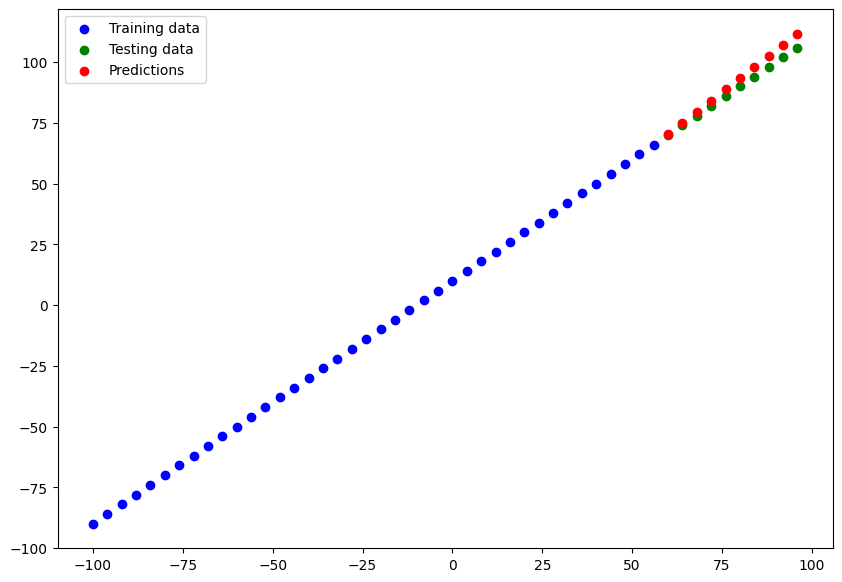

In [396]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [398]:
# Calculate model2 Evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([440.3208 , 300.4064 , 202.4802 , 146.54144, 132.59071, 160.62779,
        230.65263, 342.6655 , 496.66632, 692.65424], dtype=float32)>)

**Build Model 3**

2 layers, trained for 500 epochs

In [399]:
# Build Model 3

#Set the seeds to 42
tf.random.set_seed(42)

#1. Create the model3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =[1]),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"])

#3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)




Epoch 1/500
2/2 [==============================] - 1s 23ms/step - loss: 61.2688 - mae: 61.2688
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 41.6175 - mae: 41.6175
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 44.0969 - mae: 44.0969
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 32.1393 - mae: 32.1393
Epoch 5/500
2/2 [==============================] - 0s 17ms/step - loss: 16.7476 - mae: 16.7476
Epoch 6/500
2/2 [==============================] - 0s 12ms/step - loss: 11.3814 - mae: 11.3814
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 12.4681 - mae: 12.4681
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0659 - mae: 11.0659
Epoch 9/500
2/2 [==============================] - 0s 26ms/step - loss: 39.5301 - mae: 39.5301
Epoch 10/500
2/2 [==============================] - 0s 15ms/step - loss: 27.0449 - mae: 27.0449
Epoch 11/500
2/2 [==============================] 

1/1 [==============================] - 0s 52ms/step


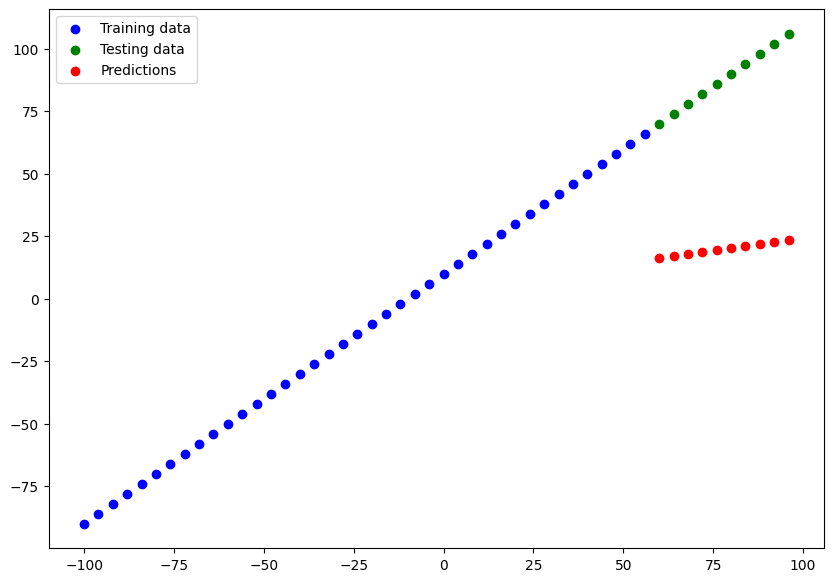

In [400]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [404]:
# Evaluation of model3
mae_3 =mae(y_test, y_preds_3)
mse_3 =mse( y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([5270.9487, 5157.3037, 5044.928 , 4933.824 , 4823.9907, 4715.428 ,
        4608.1357, 4502.1143, 4397.364 , 4293.884 ], dtype=float32)>)

**Compare the model Results of Experiments**

  * We have run few models and evaluated them so let's compare the predictions
  * When u build the models, make sure to start small and gradually increase the complexity
  *

In [406]:
# Let's compare the models results using the pandas DataFrame

import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,0,88.737534
1,model_2,0,"[440.3208, 300.4064, 202.4802, 146.54144, 132...."
2,model_3,0,"[5270.9487, 5157.3037, 5044.928, 4933.824, 482..."


from matplotlib import pyplot as plt
import seaborn as sns
all_results.groupby('model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mae']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mae'}, axis=1)
              .sort_values('mae', ascending=True))
  xs = counted['mae']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = all_results.sort_values('mae', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('model')):
  _plot_series(series, series_name, i)
  fig.legend(title='model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mae')
_ = plt.ylabel('count()')

In [407]:
model_2.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 10)                20        
                                                                 
 dense_86 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Tracking the experiments**



*   One really good habit in machine learning modeling is to track the results of your experiments
*   And when doing so, it can be tedious if you are running lot's of experiments

*   Luckly there are toold to help us

*   Resource : As u build more models' ypu will want to look into using

TensorBoard : A component of the TensorFlow library to help track modelling experiments (we'll see this one later)

Weights and Biases - A tool for tracking all of kinds of machine learning experiments (Plugs strait into TensorBoard)




**Saving the model**

1.   Saving the models allows us to use them outside of the colab
2.   We can use them in the websites and mobile applications

**There are 2 formats to save the models:**
1. SavedModel Format
2. HDF5 format


In [408]:
# Save the model using the SavedModel Format

model_2.save("best_model_SavedModel_format")